# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
!pip install emoji==1.7
import emoji
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=9e07dbae82f34a9e187cfc7b8500127139aea52e7a3b6f904d18c5a7f39551b0
  Stored in directory: /root/.cache/pip/wheels/e0/8c/e0/294d2e4ea0e55792bfc99b6b263e4a0511443da7b69af67688
Successfully built emoji


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Variables globales

In [4]:
DATASETS_NAME = {
    'SEMEVAL_2019_TRAIN': 'semeval2019_es_train.csv',
    'SEMEVAL_2019_VAL': 'semeval2019_es_dev.csv',
    'SEMEVAL_2019_TEST': 'semeval2019_es_test.csv',
}

DATASETS_DELIMITERS = {
    'SEMEVAL_2019': '	',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### SEMEVAL 2019

In [5]:
df_semeval_train = pd.read_csv ( DATASETS_NAME['SEMEVAL_2019_TRAIN'],
        skiprows=1,
        header=None,
        names = ["id", "text", "hate_speech", "target_range", "aggressiveness"],
        delimiter=DATASETS_DELIMITERS['SEMEVAL_2019'])

----------------------------

## Análisis datos



-----------------------------------------------

### Vistazo general a los datos

-----------------------------------------------


In [ ]:
df_semeval_train.head()

,id,text,hate_speech,target_range,aggressiveness
0,20001,Easyjet quiere duplicar el número de mujeres p...,1,0,0
1,20002,El gobierno debe crear un control estricto de ...,1,0,0
2,20003,Yo veo a mujeres destruidas por acoso laboral ...,0,0,0
3,20004,"— Yo soy respetuoso con los demás, sólamente l...",0,0,0
4,20007,Antonio Caballero y como ser de mal gusto e ig...,0,0,0


In [ ]:
df_semeval_train.head()

,id,text,hate_speech,target_range,aggressiveness
0,20001,Easyjet quiere duplicar el número de mujeres p...,1,0,0
1,20002,El gobierno debe crear un control estricto de ...,1,0,0
2,20003,Yo veo a mujeres destruidas por acoso laboral ...,0,0,0
3,20004,"— Yo soy respetuoso con los demás, sólamente l...",0,0,0
4,20007,Antonio Caballero y como ser de mal gusto e ig...,0,0,0


In [ ]:
#Valores unicos
df_semeval_train.nunique()

,0
id,4450
text,4450
hate_speech,2
target_range,2
aggressiveness,2



-----------------------------------------------

### Proporciones

-----------------------------------------------


In [ ]:
print("Proporcion en la columna 'hate_speech':")
df_semeval_train["hate_speech"].value_counts(normalize=True) * 100

Proporcion en la columna 'hate_speech':


,proportion
hate_speech,
0,58.808989
1,41.191011


In [ ]:
print("Proporcion en la columna 'target_range':")
df_semeval_train["target_range"].value_counts(normalize=True) * 100

Proporcion en la columna 'target_range':


,proportion
target_range,
0,74.988764
1,25.011236


In [ ]:
print("Proporcion en la columna 'aggressiveness':")
df_semeval_train["aggressiveness"].value_counts(normalize=True) * 100

Proporcion en la columna 'aggressiveness':


,proportion
aggressiveness,
0,66.741573
1,33.258427



-----------------------------------------------

### Longitud de los textos

-----------------------------------------------


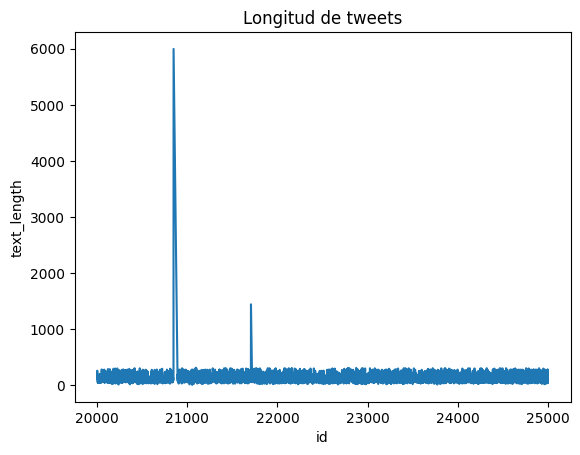

In [ ]:
df_semeval_train["text_length"] = df_semeval_train["text"].apply(len)

sns.lineplot(x=df_semeval_train["id"],  y=df_semeval_train["text_length"])
plt.title("Longitud de tweets")
plt.show()

In [ ]:
# Longitud máxima y mínima
print("Longitud máxima: ", max(df_semeval_train["text_length"]))
print("Longitud mínima: ", min(df_semeval_train["text_length"]))

Longitud máxima:  5996
Longitud mínima:  6



-----------------------------------------------

### Palabras más frecuentes

-----------------------------------------------


In [ ]:
# lista de palabras/signos puntuacion que no se tendran en cuenta (se añaden los relacionados con links)
stop_words = set(stopwords.words('spanish') + list(string.punctuation) + ['http', 'https', 't.co'])

tweets = " ".join(df_semeval_train["text"])
words = word_tokenize(tweets.lower())

words_filtered = [word for word in words if word not in stop_words]
word_freq = Counter(words_filtered)

print("Las 25 palabras más comunes y su núm de apariciones:")
word_freq.most_common(25)

Las 25 palabras más comunes y su núm de apariciones:


[('puta', 1455),
 ('perra', 545),
 ('si', 496),
 ('...', 450),
 ('callate', 423),
 ('cállate', 382),
 ('hijo', 304),
 ('zorra', 290),
 ('q', 289),
 ('madre', 237),
 ('mereces', 231),
 ('acoso', 225),
 ('mierda', 224),
 ('inmigrantes', 205),
 ('ser', 197),
 ('mujer', 188),
 ("''", 187),
 ('polla', 170),
 ('``', 169),
 ('árabes', 158),
 ('árabe', 138),
 ('mujeres', 126),
 ('cara', 122),
 ('bien', 122),
 ('violación', 119)]

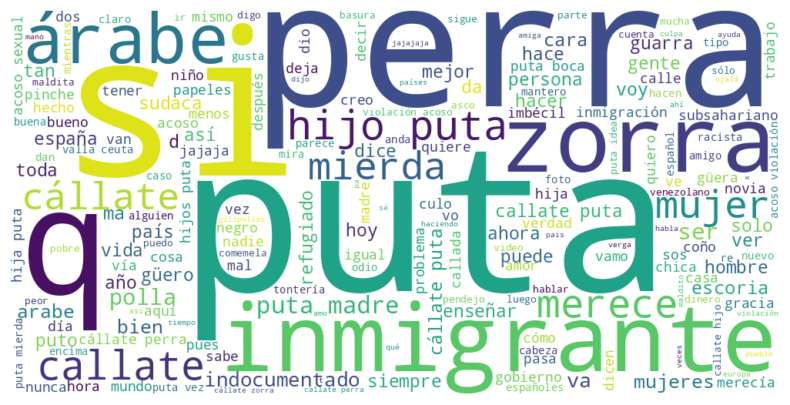

In [ ]:
# Nube de palabras de las palabras más comunes

#eliminamos urls
words_filtered = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
).sub("", " ".join(words_filtered))

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(words_filtered)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Palabras más comunes en los tweets de hate_speech

hate_speech_texts = " ".join(df_semeval_train[df_semeval_train["hate_speech"] == 1]["text"])
words = word_tokenize(hate_speech_texts.lower())

words_filtered_hate_speech_texts = [word for word in words if word not in stop_words]
word_freq = Counter(words_filtered_hate_speech_texts)

print("Las 25 palabras más comunes en textos hate_speech y su núm de apariciones:")
word_freq.most_common(25)

Las 25 palabras más comunes en textos hate_speech y su núm de apariciones:


[('puta', 519),
 ('perra', 399),
 ('zorra', 247),
 ('callate', 235),
 ('si', 222),
 ('cállate', 220),
 ('...', 164),
 ('inmigrantes', 112),
 ('q', 108),
 ('mujer', 107),
 ('mierda', 95),
 ('mereces', 92),
 ('0', 88),
 ("''", 86),
 ('ser', 81),
 ('``', 73),
 ('1', 72),
 ('españa', 66),
 ('hija', 64),
 ('bien', 63),
 ('mujeres', 61),
 ('árabes', 60),
 ('mas', 57),
 ('país', 55),
 ('subsaharianos', 53)]

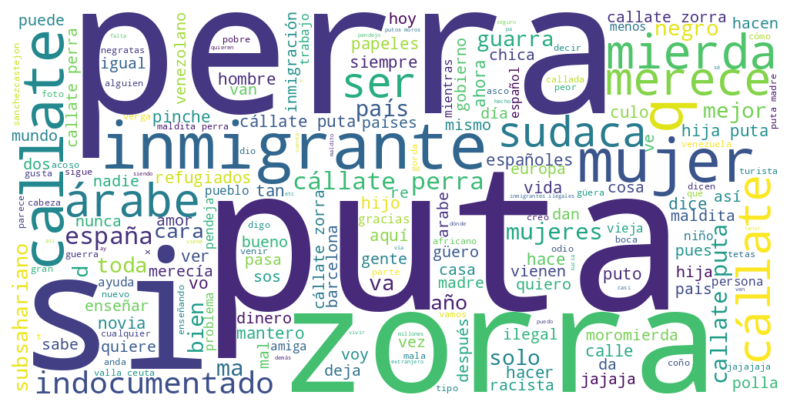

In [ ]:
# Nube de palabras de las palabras más comunes en textos de hate_speech

#eliminamos urls
words_filtered_hate_speech_texts = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
).sub("", " ".join(words_filtered_hate_speech_texts))

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(words_filtered_hate_speech_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


-----------------------------------------------

### Hashtags

-----------------------------------------------


In [ ]:
df_semeval_train["hashtags"] = df_semeval_train["text"].apply(lambda x: re.findall(r"#(\w+)", x))
list_semeval_hashtags = [hashtag for hashtags in df_semeval_train["hashtags"] for hashtag in hashtags]

hashtag_counts = Counter(list_semeval_hashtags)

print("Los 15 hashtags más comunes y su núm de apariciones:")
hashtag_counts.most_common(15)

Los 15 hashtags más comunes y su núm de apariciones:


[('OTGala7', 8),
 ('inmigrantes', 7),
 ('OTGala9', 6),
 ('OTGala8', 5),
 ('refugiados', 5),
 ('inmigración', 5),
 ('inmigracion', 5),
 ('Arandina', 4),
 ('indocumentados', 4),
 ('Barcelona', 4),
 ('Ceuta', 4),
 ('DefiendeEspaña', 4),
 ('Inmigración', 4),
 ('España', 3),
 ('HaceMuchoQue', 3)]

In [ ]:
print(f"Hay {len(list_semeval_hashtags)} hashtags en los {len(df_semeval_train.index)} datos")
for i in df_semeval_train["hashtags"]:
    if (len(i)>0):
        print(i)

Hay 838 hashtags en los 4450 datos
['Noticiasdelalinea']
['NoTodosLosHombres']
['Arandina']
['SoltarteNoEstáEnMisPlanesMica']
['OTGala8']
['esdemexicanos']
['desinformation']
['ExatlonMx']
['ChiringuitoKepa']
['NosTomanPorImbéciles']
['OTGala8']
['Repost']
['pautab']
['ahorasicambio']
['HDPasesinos']
['indocumentados']
['l6nveranofranco']
['camposdeautogestión']
['FronterasSeguras']
['myhyv']
['FIFAeWorldCup']
['Aquaman']
['puta', 'bastardo']
['Historia', 'Video']
['campoderefugiados', 'españa']
['AgendaPública']
['YacyretaSeEntregó']
['AñoNuevoEnCombate']
['funweekend']
['niñas', 'niños', 'adolescentes', 'refugiados']
['InformateEnHolaChile']
['CállateYfriega']
['españaesuna', 'stopUE', 'stopLGTB']
['FinalLaVoz']
['Árabe']
['TODASPUTAS']
['FateZero']
['jugadores', 'Arandina', 'abusossexuales', 'menor', 'movimientojupsin', 'gentejupsin', 'acoso']
['inmigración']
['EnTuJeta']
['MMVAs', 'FFArtistShawn']
['nohaydineros']
['LQSAForever']
['Sociedad']
['HechosReales']
['España', 'inmigrante

In [ ]:
# Hashtags en tweets hate_speech
hate_speech_hashtags = df_semeval_train[df_semeval_train["hate_speech"] == 1]["hashtags"].explode().dropna()
hate_speech_hashtags_counts = Counter(hate_speech_hashtags)

print("Los 15 hashtags más comunes en textos hate_speech y su núm de apariciones:")
hate_speech_hashtags_counts.most_common(15)

Los 15 hashtags más comunes en textos hate_speech y su núm de apariciones:


[('Barcelona', 4),
 ('Inmigración', 4),
 ('venezuela', 3),
 ('StopInvasion', 3),
 ('ExatlonMx', 2),
 ('NosTomanPorImbéciles', 2),
 ('españa', 2),
 ('españaesuna', 2),
 ('stopUE', 2),
 ('stopLGTB', 2),
 ('inmigración', 2),
 ('PdV06A', 2),
 ('SanchezDimision', 2),
 ('SanchezVeteYa', 2),
 ('DefiendeEspaña', 2)]

In [ ]:
# Todos los hashtags que aparecen en tweets hate_speech
print(f"De los {len(list_semeval_hashtags)} hashtags, en tweets hate_speech hay {len(hate_speech_hashtags)}")
for i in hate_speech_hashtags:
    if (len(i)>0):
        print(i)

De los 838 hashtags, en tweets hate_speech hay 225
ExatlonMx
NosTomanPorImbéciles
l6nveranofranco
camposdeautogestión
FronterasSeguras
campoderefugiados
españa
AñoNuevoEnCombate
InformateEnHolaChile
CállateYfriega
españaesuna
stopUE
stopLGTB
EnTuJeta
HechosReales
EsMuyDeProVida
FelizDomingo
Urgente
RevolucionIndestructible
LEL
YouNeverLovedMe
politivida
Catalunya
Canarias
lanzarote
Idonotwantmafias
Spain
LaCornisa
elcascabel06a
perroanimal
L6Nfranco
EXCLUSIVA
Pendejos
NosTomanPorImbéciles
todasputas
AcogidaDigna
RacismoEs
venezuela
Barcelona
inmigración
InmigrantesNO
inmigrantes
africanos
stopislam
stopinvasion
banislam
yaesmediodia32
StopInvasion
StopIslam
Closeborders
Openborders
Manteros
Barcelona
TodasPutas
OmarPrieto
extranjeros
venezuela
extranjero
venezuela
deporten
MaduroGenocida
MaduroAcabóConVzla
maduroesmuerte
sanidaduniversal
España
Ceuta
moromierdas
PdV06A
3Ago
SanchezDimision
SanchezVeteYa
TipicoDeCelosos
DefiendeEspaña
españa
EleccionesGeneralesYA
TetasFree
hombres
votoj


-----------------------------------------------

### Emojis

-----------------------------------------------


In [ ]:
def extract_emojis(text):
    return [char for char in text if char in emoji.UNICODE_EMOJI["es"]]
df_semeval_train["emojis"] = df_semeval_train["text"].apply(extract_emojis)

In [ ]:
# Emojis más comunes
all_emojis = [e for emojis in df_semeval_train["emojis"] for e in emojis]
emoji_counts = Counter(all_emojis)

print("Los 15 emojis más comunes y su núm de apariciones:")
emoji_counts.most_common(15)

Los 15 emojis más comunes y su núm de apariciones:


[('😂', 190),
 ('😍', 60),
 ('👏', 46),
 ('❤', 43),
 ('😡', 43),
 ('😭', 40),
 ('🏼', 29),
 ('🏻', 29),
 ('🤣', 24),
 ('♀', 23),
 ('😘', 21),
 ('😠', 20),
 ('🤔', 20),
 ('🙄', 20),
 ('😒', 17)]

In [ ]:
# emojis en tweets hate_speech
hate_speech_emojis = df_semeval_train[df_semeval_train["hate_speech"] == 1]["emojis"].explode().dropna()
hate_speech_emojis_counts = Counter(hate_speech_emojis)

print("Los 15 emojis más comunes en textos hate_speech y su núm de apariciones:")
hate_speech_emojis_counts.most_common(15)

Los 15 emojis más comunes en textos hate_speech y su núm de apariciones:


[('😂', 95),
 ('😡', 24),
 ('😠', 16),
 ('🤣', 15),
 ('🙄', 12),
 ('😍', 12),
 ('🤦', 11),
 ('♀', 11),
 ('🏽', 10),
 ('😘', 8),
 ('❤', 8),
 ('😒', 8),
 ('👿', 7),
 ('😢', 7),
 ('🏻', 7)]

In [ ]:
print(f"De {len(all_emojis)} emojis, {len(hate_speech_emojis)} estan incluidos en tweets hate_speech")

De 1244 emojis, 468 estan incluidos en tweets hate_speech


--------------------------------------------

In [1]:
! pip install "matplotlib<3.8"
import matplotlib.pyplot as plt

In [2]:
! pip install shifterator
import shifterator as sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 21.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


[]

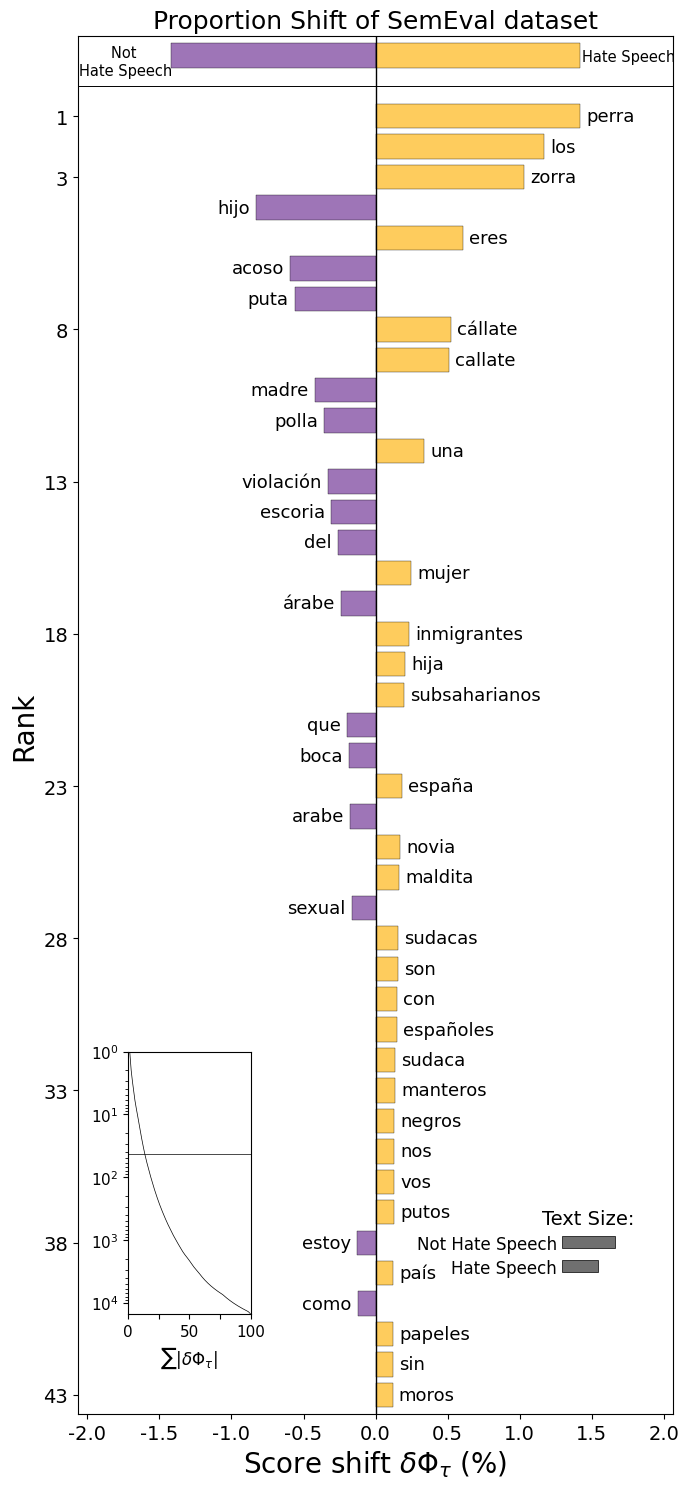

In [13]:
url_pattern = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)"
    r"(?:\w{1,}\.{1}){1,5}"
    r"(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm)"
    r"(?:\/[a-zA-Z0-9]{1,})*)"
)

def preprocess_tweets_no_stopwords(tweets, url_pattern):
    text = " ".join(tweets).lower()

    text = url_pattern.sub("", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and len(w) > 2]
    return tokens

tweets_label_0 = df_semeval_train[df_semeval_train["hate_speech"] == 0]["text"]
tweets_label_1 = df_semeval_train[df_semeval_train["hate_speech"] == 1]["text"]

words_0 = preprocess_tweets_no_stopwords(tweets_label_0, url_pattern)
words_1 = preprocess_tweets_no_stopwords(tweets_label_1, url_pattern)

freq_0 = Counter(words_0)
freq_1 = Counter(words_1)

proportion_shift = sh.ProportionShift(type2freq_1=freq_0,
                                      type2freq_2=freq_1)
fig = proportion_shift.get_shift_graph(
    system_names=['Not Hate Speech', 'Hate Speech'],
    title='Proportion Shift of SemEval dataset',
    show_plot=False,
    top_n = 43
)

fig.text(
    0.08, 0.97,
    f"Not \nHate Speech",
    ha="center",
    va="bottom",
    fontsize=10.50,
    transform=fig.transAxes,
)

fig.text(
    0.925, 0.98,
    f"Hate Speech",
    ha="center",
    va="bottom",
    fontsize=10.50,
    transform=fig.transAxes,
)
fig.plot()